In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import  seaborn as sns


def sql_query (db_file, query):
    conn = sqlite3.connect(db_file)
    check = pd.read_sql_query(query,conn)
    conn.close()
    return check

if __name__ == "__main__":
    query_results = sql_query('Imot_bg.db', "SELECT * FROM Imoti")

    print(query_results.head())

        Location   Price  square_metres  floor    bedrooms
0     Karpuzitsa  340000            231      2  Maisonette
1  m-t Kambanite  280621            284      3  Maisonette
2       Lozenets  375000            143      5  Maisonette
3         Boyana  389000            166      1  Maisonette
4         Boyana  385000            200      0  Maisonette


In [42]:
data = query_results.copy()
data

,Location,Price,square_metres,floor,bedrooms
0,Karpuzitsa,340000,231,2,Maisonette
1,m-t Kambanite,280621,284,3,Maisonette
2,Lozenets,375000,143,5,Maisonette
3,Boyana,389000,166,1,Maisonette
4,Boyana,385000,200,0,Maisonette
...,...,...,...,...,...
9075,Ovcha kupel 2,171646,104,2,2
9076,Boyana,360000,165,3,2
9077,Vitosha,182000,97,1,2
9078,Mladost 1A,285000,107,6,2


<AxesSubplot:title={'center':'Box Plot of Price by Number of Bedrooms'}, xlabel='bedrooms', ylabel='Price'>

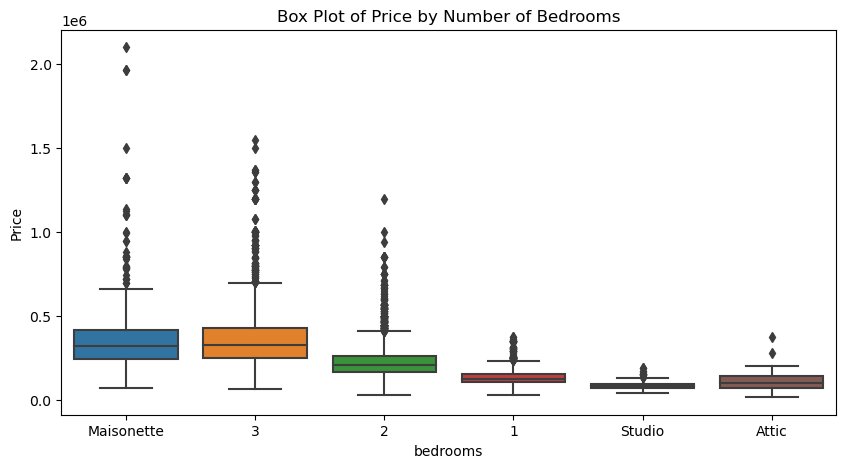

In [95]:
plt.figure(figsize=(10,5))
plt.title ('Box Plot of Price by Number of Bedrooms')
sns.boxplot(data=data, x ='bedrooms', y = 'Price')

Text(0.5, 0, 'Price')

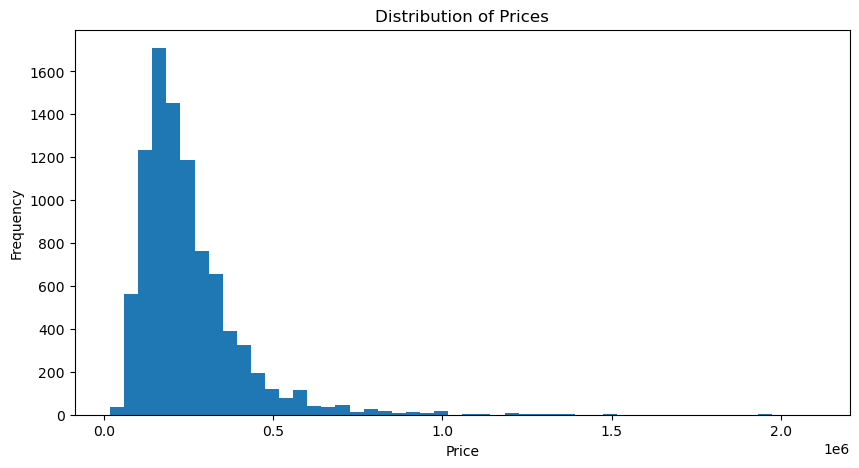

In [99]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Prices')
data.Price.plot(kind='hist', bins=50)
plt.xlabel('Price')

<AxesSubplot:title={'center':'Most listings for sale'}>

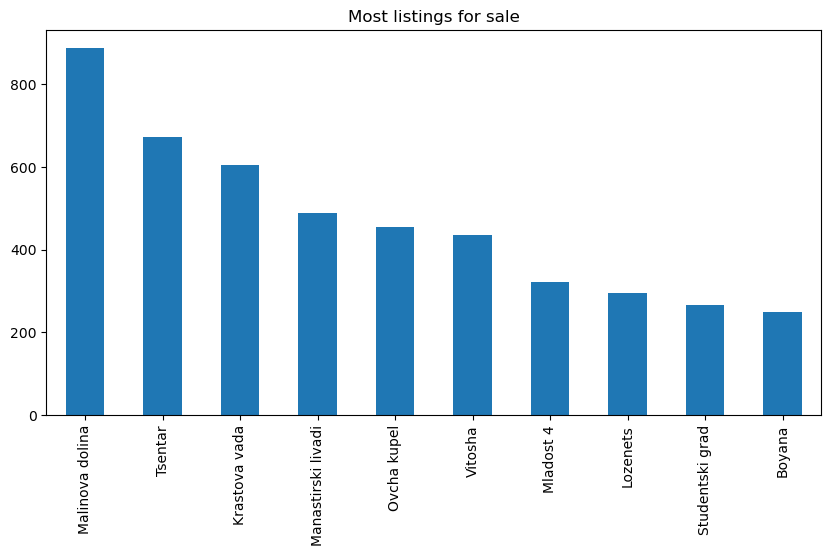

In [116]:
top_10_most_selling_locations=data.Location.value_counts().iloc[:10]
plt.title('Most listings for sale')
top_10_most_selling_locations.plot(kind='bar', figsize=(10,5))

<AxesSubplot:xlabel='Location'>

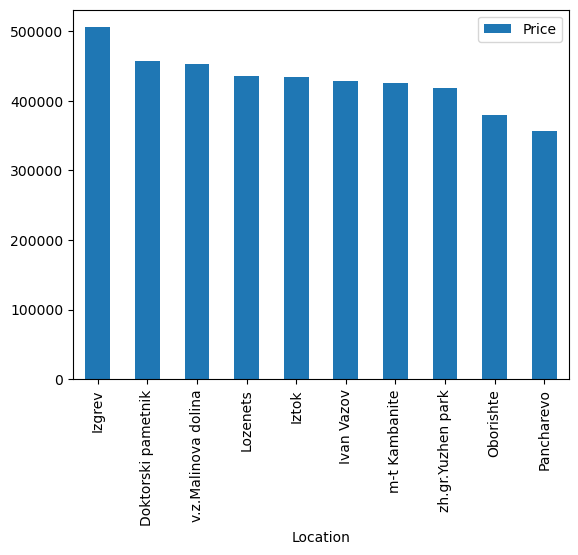

In [66]:

top_10_location_prices = data.groupby('Location').agg({'Price':pd.Series.mean}).sort_values(by='Price', ascending = False).iloc[:10]

top_10_location_prices.plot(kind='bar')

Text(0.5, 0, 'Location')

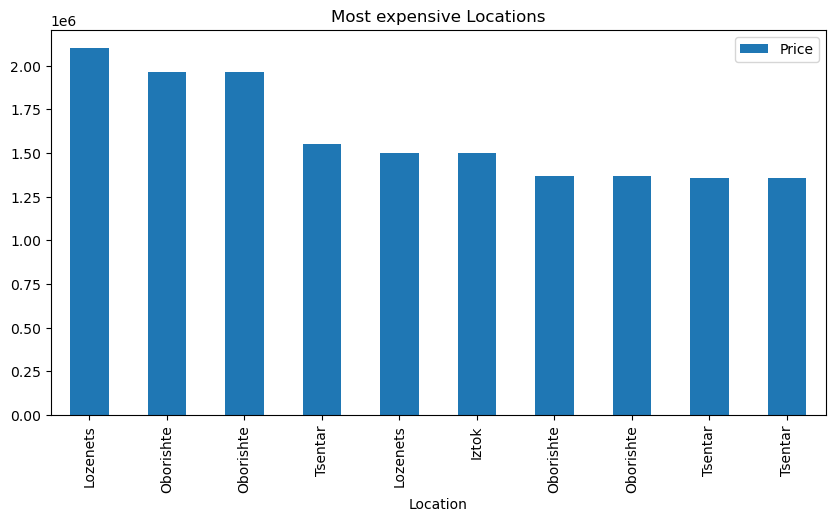

In [106]:
top_10_most_expensive = data[['Location','Price']].sort_values(by='Price',ascending=False).iloc[:10]
top_10_most_expensive.plot(kind ='bar', x = 'Location', figsize = (10,5))
plt.title('Most expensive Locations')
plt.xlabel('Location')

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

C:\Users\mery_\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
X = data.drop(columns = (['Price']),axis=1)
y = data['Price']

In [7]:
le = LabelEncoder()
X['Location'] = le.fit_transform(X['Location'])
X['bedrooms'] = le.fit_transform(X['bedrooms'])

In [9]:
data

,Location,Price,square_metres,floor,bedrooms
0,Karpuzitsa,340000,231,2,Maisonette
1,m-t Kambanite,280621,284,3,Maisonette
2,Lozenets,375000,143,5,Maisonette
3,Boyana,389000,166,1,Maisonette
4,Boyana,385000,200,0,Maisonette
...,...,...,...,...,...
9075,Ovcha kupel 2,171646,104,2,2
9076,Boyana,360000,165,3,2
9077,Vitosha,182000,97,1,2
9078,Mladost 1A,285000,107,6,2


In [10]:
X_train , X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [11]:
models = {'RandomForest': RandomForestRegressor(),
          'Linear Regression': LinearRegression(),
          'KNN':KNeighborsRegressor(),
           'Tree': DecisionTreeRegressor()}


def train_test_model (model,X_train,X_test,y_train,y_test):
    
    model_scores = {}
    
    for name,model in models.items():
        
        model.fit(X_train,y_train)
        score = model.score(X_train,y_train)
        model_scores[name] = score
    return model_scores
    
    

In [12]:
model = train_test_model(models,X_train,X_test,y_train,y_test)
model

{'RandomForest': 0.9308000897651292,
 'Linear Regression': 0.4547206655472694,
 'KNN': 0.7414970844477228,
 'Tree': 0.9555391026089688}

In [13]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
rf_model.score(X_train,y_train), rf_model.score(X_test,y_test)

(0.9294565180904453, 0.7137335658097634)

In [14]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
tree.score(X_train,y_train),tree.score(X_test,y_test)

(0.9555391026089688, 0.5396488989783581)

In [15]:
param_grid = {'max_depth':[None,2,5], 
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,5,10]}


from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5 )
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [16]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

RandomForestRegressor()
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.7089466396407491


In [17]:
y_pred = rf_model.predict(X_test)
mean_absolute_error(y_pred,y_test)

38204.077930530664

In [118]:
region_number = pd.DataFrame({'Name':data.Location, 'Number':X.Location})

In [119]:
region_number[region_number.Name == 'Vitosha']

,Name,Number
68,Vitosha,103
71,Vitosha,103
75,Vitosha,103
92,Vitosha,103
112,Vitosha,103
...,...,...
9036,Vitosha,103
9041,Vitosha,103
9051,Vitosha,103
9067,Vitosha,103


In [120]:
rf_model.predict([[103,60,4,1]])

C:\Users\mery_\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([160518.51])